# Kaggle Playground Series S5E7: 内向型・外向型予測 EDA分析

**日付**: 2025-07-02  
**タスク**: 二値分類（内向型 vs 外向型予測）  
**目標**: Accuracy Score の最大化

## 1. ライブラリインポートとデータ読み込み

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
import japanize_matplotlib

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")
sns.set(font='IPAexGothic')

print("=== Kaggle Playground Series S5E7: 内向型・外向型予測 EDA ===")

=== Kaggle Playground Series S5E7: 内向型・外向型予測 EDA ===


In [11]:
# データ読み込み
data_path = Path('../data/raw')

train_df = pd.read_csv(data_path / 'train.csv')
test_df = pd.read_csv(data_path / 'test.csv')
sample_sub = pd.read_csv(data_path / 'sample_submission.csv')

print(f"訓練データ形状: {train_df.shape}")
print(f"テストデータ形状: {test_df.shape}")
print(f"サンプル提出ファイル形状: {sample_sub.shape}")

訓練データ形状: (18524, 9)
テストデータ形状: (6175, 8)
サンプル提出ファイル形状: (6175, 2)


## 2. データセット基本情報

In [12]:
print("訓練データの最初の5行:")
display(train_df.head())

print("\nデータ型:")
display(train_df.dtypes)

print("\n訓練データ列:", list(train_df.columns))
print("テストデータ列:", list(test_df.columns))

訓練データの最初の5行:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert



データ型:


id                             int64
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object


訓練データ列: ['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']
テストデータ列: ['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']


## 3. 欠損値分析

In [13]:
print("=== 欠損値分析 ===")

# 訓練データ欠損値
train_missing = train_df.isnull().sum()
train_missing_pct = (train_missing / len(train_df)) * 100
missing_train = pd.DataFrame({
    '欠損数': train_missing,
    '欠損率(%)': train_missing_pct
}).round(2)

print("訓練データ欠損値:")
display(missing_train[missing_train['欠損数'] > 0])

# テストデータ欠損値
test_missing = test_df.isnull().sum()
test_missing_pct = (test_missing / len(test_df)) * 100
missing_test = pd.DataFrame({
    '欠損数': test_missing,
    '欠損率(%)': test_missing_pct
}).round(2)

print("\nテストデータ欠損値:")
display(missing_test[missing_test['欠損数'] > 0])

=== 欠損値分析 ===
訓練データ欠損値:


,欠損数,欠損率(%)
Time_spent_Alone,1190,6.42
Stage_fear,1893,10.22
Social_event_attendance,1180,6.37
Going_outside,1466,7.91
Drained_after_socializing,1149,6.20
Friends_circle_size,1054,5.69
Post_frequency,1264,6.82



テストデータ欠損値:


,欠損数,欠損率(%)
Time_spent_Alone,425,6.88
Stage_fear,598,9.68
Social_event_attendance,397,6.43
Going_outside,466,7.55
Drained_after_socializing,432,7.00
Friends_circle_size,350,5.67
Post_frequency,408,6.61


## 4. ターゲット変数分析

=== ターゲット変数分析 ===
ターゲット分布:
  Extrovert: 13699 (74.0%)
  Introvert: 4825 (26.0%)


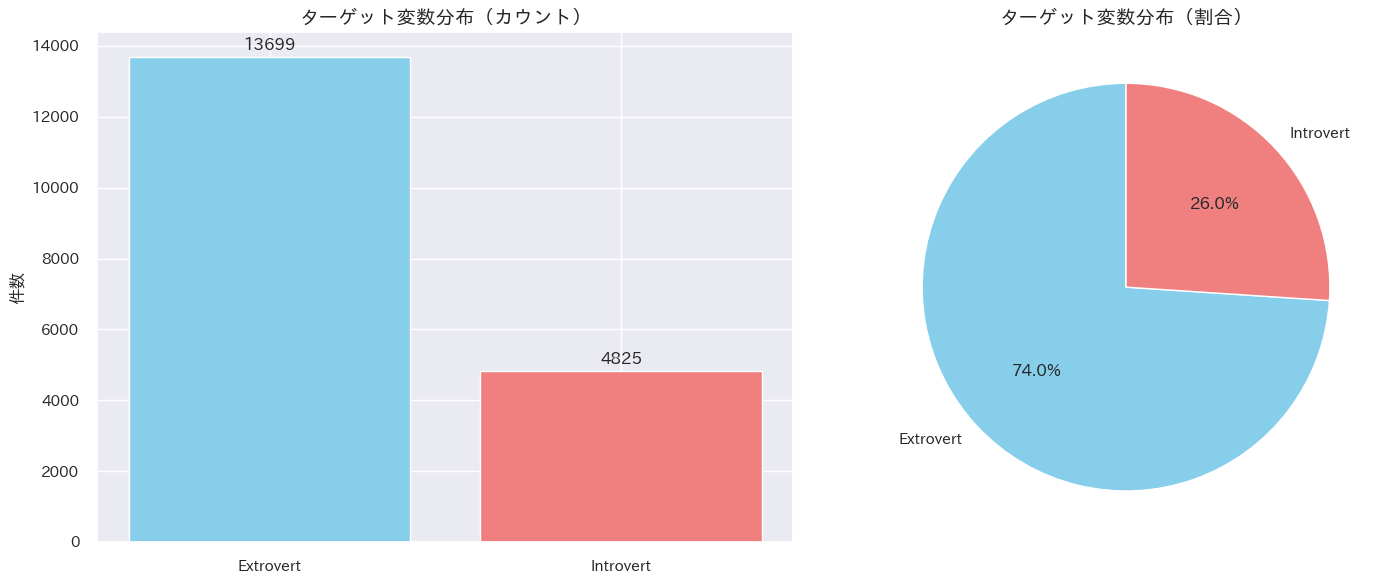

In [14]:
print("=== ターゲット変数分析 ===")

target_dist = train_df['Personality'].value_counts()
target_pct = train_df['Personality'].value_counts(normalize=True) * 100

print("ターゲット分布:")
for personality, count in target_dist.items():
    pct = target_pct[personality]
    print(f"  {personality}: {count} ({pct:.1f}%)")

# ターゲット変数の可視化
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# ターゲット分布（カウント）
target_counts = train_df['Personality'].value_counts()
ax[0].bar(target_counts.index, target_counts.values, color=['skyblue', 'lightcoral'])
ax[0].set_title('ターゲット変数分布（カウント）', fontsize=14)
ax[0].set_ylabel('件数')
for i, v in enumerate(target_counts.values):
    ax[0].text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')

# ターゲット分布（割合）
target_pct = train_df['Personality'].value_counts(normalize=True) * 100
colors = ['skyblue', 'lightcoral']
wedges, texts, autotexts = ax[1].pie(target_pct.values, labels=target_pct.index, 
                                    autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].set_title('ターゲット変数分布（割合）', fontsize=14)

plt.tight_layout()
plt.show()

## 5. 数値特徴量分析

In [15]:
print("=== 数値特徴量基本統計 ===")

numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'id']

print("数値特徴量基本統計:")
display(train_df[numeric_cols].describe().round(2))

# 数値範囲チェック
print("\n数値特徴量範囲チェック:")
for col in numeric_cols:
    min_val = train_df[col].min()
    max_val = train_df[col].max()
    print(f"  {col}: [{min_val}, {max_val}]")

=== 数値特徴量基本統計 ===
数値特徴量基本統計:


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,17334.00,17344.00,17058.00,17470.00,17260.00
mean,3.14,5.27,4.04,8.00,4.98
std,3.00,2.75,2.06,4.22,2.88
min,0.00,0.00,0.00,0.00,0.00
25%,1.00,3.00,3.00,5.00,3.00
50%,2.00,5.00,4.00,8.00,5.00
75%,4.00,8.00,6.00,12.00,7.00
max,11.00,10.00,7.00,15.00,10.00



数値特徴量範囲チェック:
  Time_spent_Alone: [0.0, 11.0]
  Social_event_attendance: [0.0, 10.0]
  Going_outside: [0.0, 7.0]
  Friends_circle_size: [0.0, 15.0]
  Post_frequency: [0.0, 10.0]


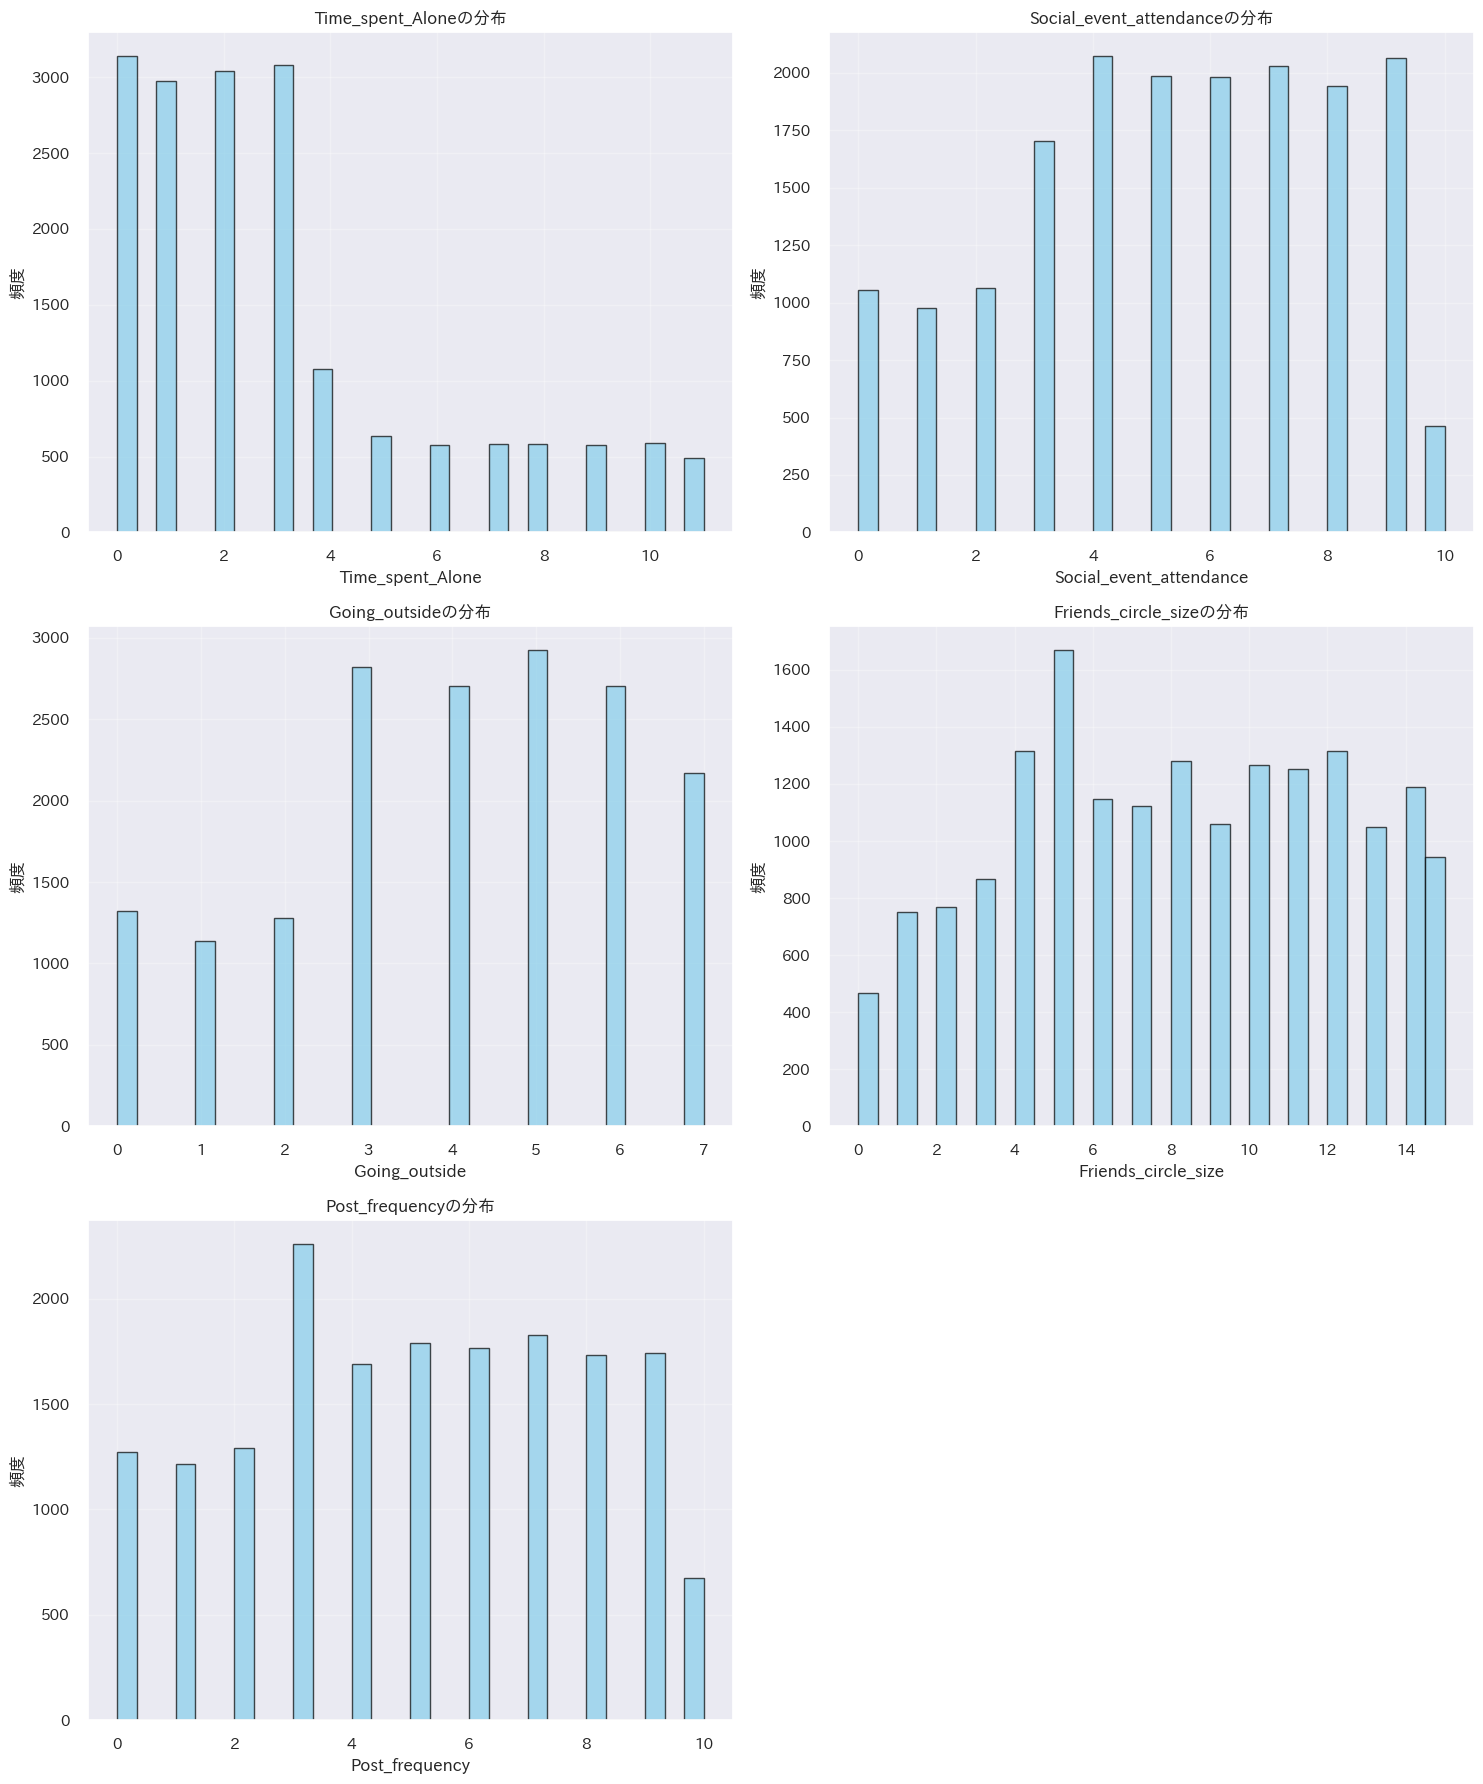

In [16]:
# 数値特徴量分布の可視化
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # ヒストグラム（全体）
    axes[i].hist(train_df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col}の分布', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('頻度')
    axes[i].grid(True, alpha=0.3)

# 6番目のサブプロットを削除
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

## 6. カテゴリカル特徴量分析

In [17]:
print("=== カテゴリカル特徴量分析 ===")

categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Personality']

for col in categorical_cols:
    print(f"\n{col}の分布:")
    value_counts = train_df[col].value_counts(dropna=False)
    value_pct = train_df[col].value_counts(normalize=True, dropna=False) * 100
    for value, count in value_counts.items():
        pct = value_pct[value]
        print(f"  {value}: {count} ({pct:.1f}%)")

=== カテゴリカル特徴量分析 ===

Stage_fearの分布:
  No: 12609 (68.1%)
  Yes: 4022 (21.7%)
  nan: 1893 (10.2%)

Drained_after_socializingの分布:
  No: 13313 (71.9%)
  Yes: 4062 (21.9%)
  nan: 1149 (6.2%)


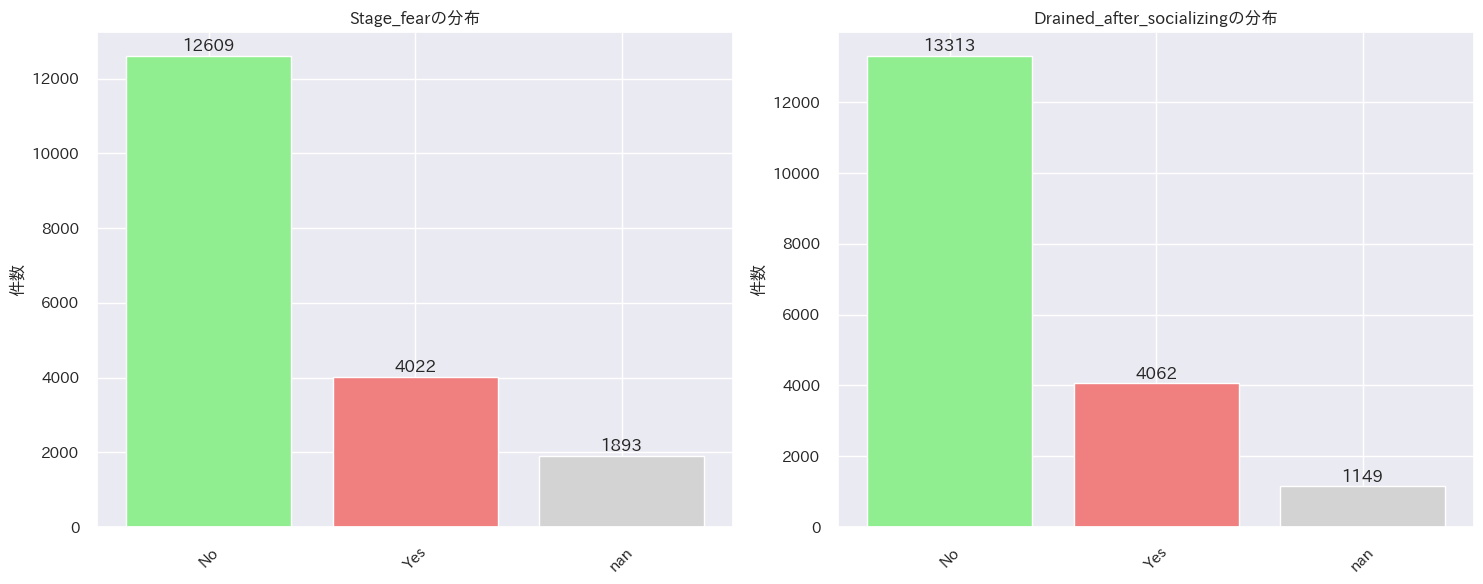

In [18]:
# カテゴリカル特徴量の可視化
categorical_cols = ['Stage_fear', 'Drained_after_socializing']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, col in enumerate(categorical_cols):
    value_counts = train_df[col].value_counts(dropna=False)
    bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                      color=['lightgreen', 'lightcoral', 'lightgray'])
    axes[i].set_title(f'{col}の分布', fontsize=12)
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45)
    axes[i].set_ylabel('件数')
    
    # 値をバーの上に表示
    for j, v in enumerate(value_counts.values):
        axes[i].text(j, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. ターゲット別特徴量分布分析

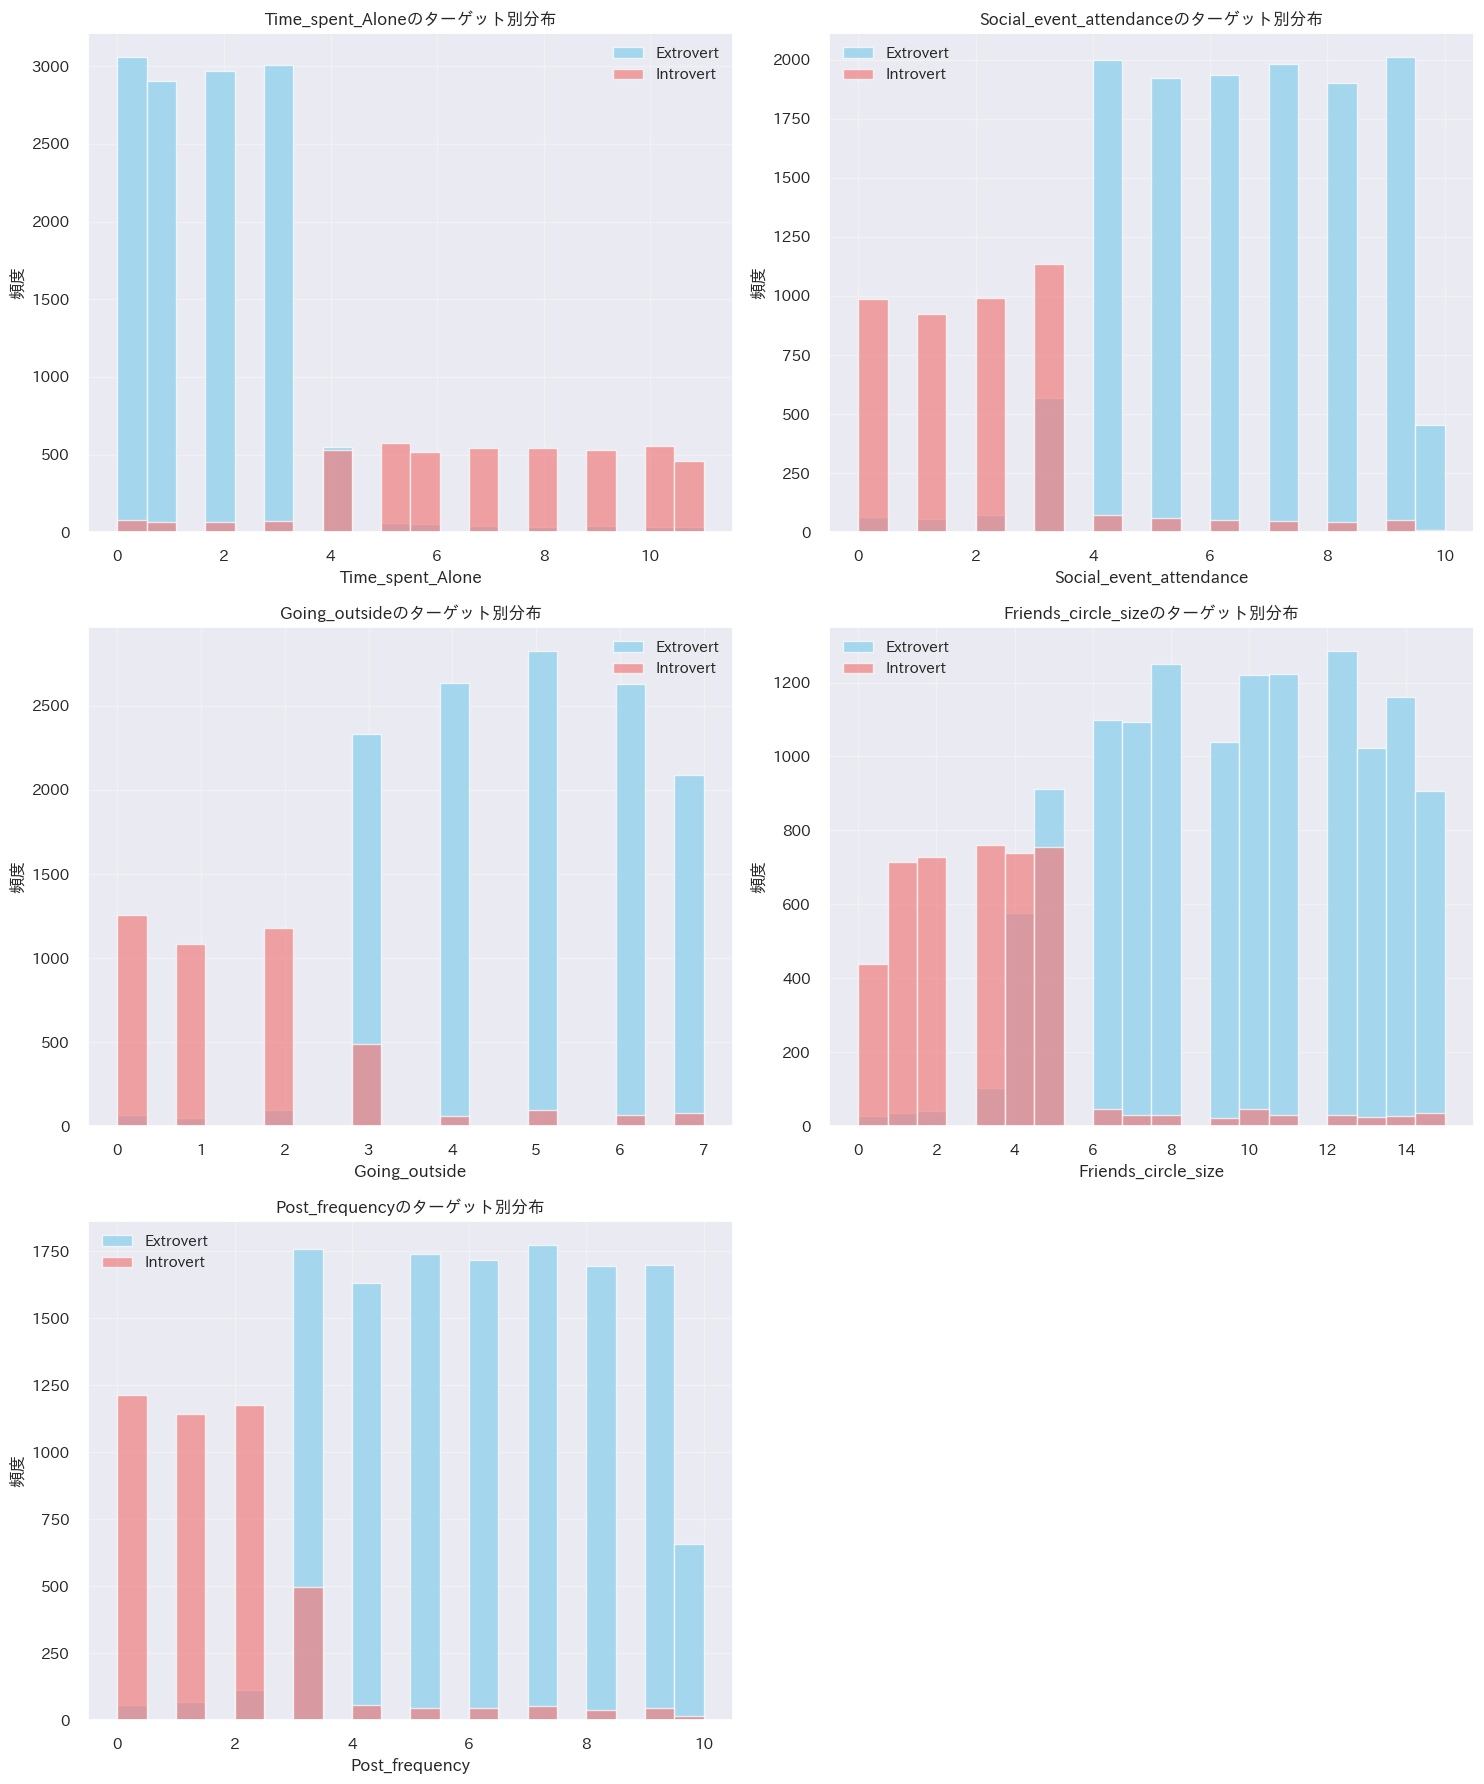

In [19]:
# ターゲット別特徴量分布
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # ターゲット別ヒストグラム
    extrovert_data = train_df[train_df['Personality'] == 'Extrovert'][col].dropna()
    introvert_data = train_df[train_df['Personality'] == 'Introvert'][col].dropna()
    
    axes[i].hist(extrovert_data, bins=20, alpha=0.7, label='Extrovert', color='skyblue')
    axes[i].hist(introvert_data, bins=20, alpha=0.7, label='Introvert', color='lightcoral')
    axes[i].set_title(f'{col}のターゲット別分布', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('頻度')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

## 8. 特徴量相関分析

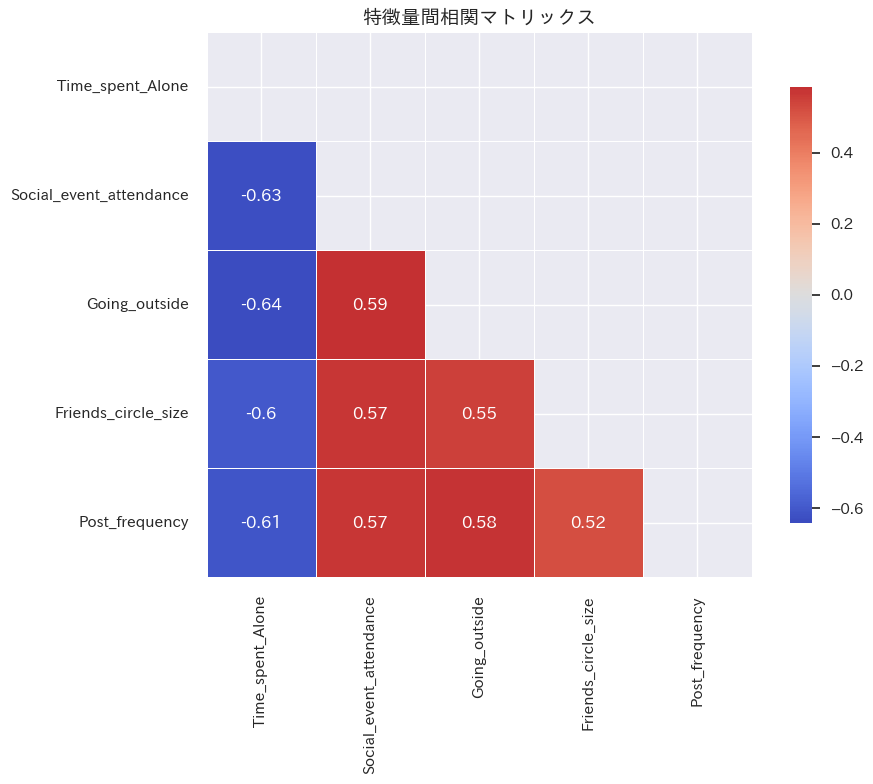

相関マトリックス:


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000,-0.629,-0.641,-0.598,-0.612
Social_event_attendance,-0.629,1.000,0.585,0.567,0.567
Going_outside,-0.641,0.585,1.000,0.550,0.579
Friends_circle_size,-0.598,0.567,0.550,1.000,0.522
Post_frequency,-0.612,0.567,0.579,0.522,1.000


In [20]:
# 特徴量相関分析
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

numeric_df = train_df[numeric_cols].copy()
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('特徴量間相関マトリックス', fontsize=14)
plt.tight_layout()
plt.show()

print("相関マトリックス:")
display(correlation_matrix.round(3))

## 9. 欠損値パターン分析

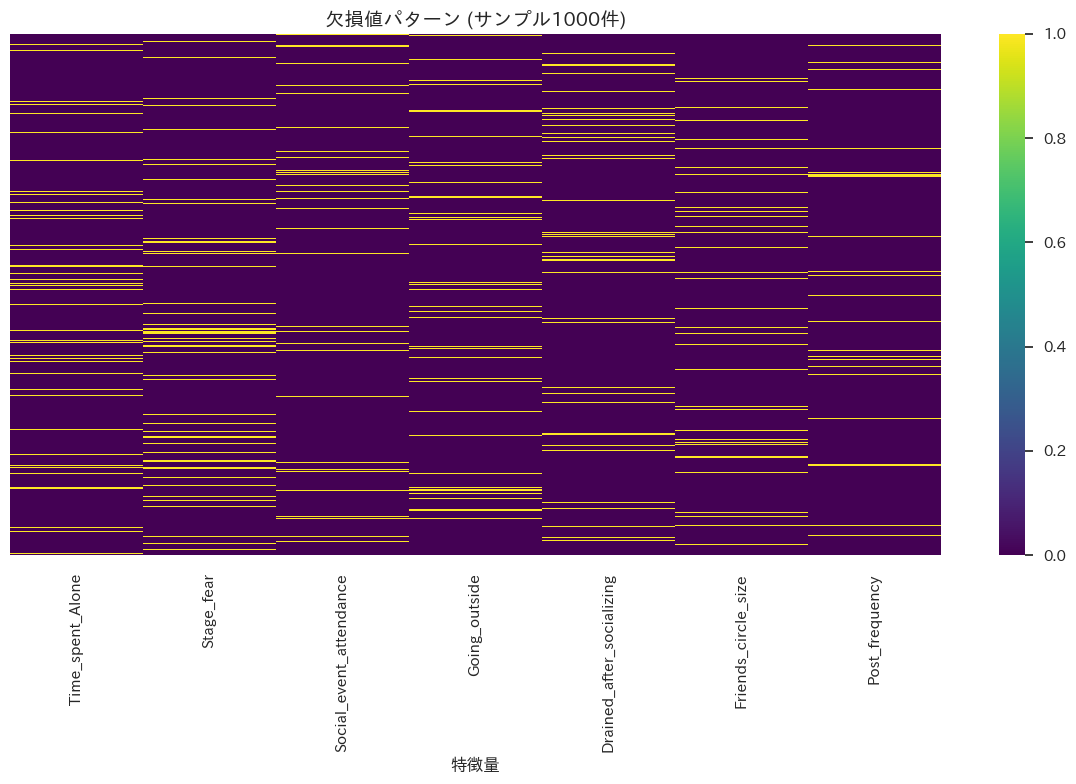

In [21]:
# 欠損値パターン分析
missing_data = train_df.isnull()
missing_cols = missing_data.columns[missing_data.sum() > 0].tolist()

if missing_cols:
    plt.figure(figsize=(12, 8))
    # サンプルを減らして可視化（全データは重すぎるため）
    sample_size = min(1000, len(train_df))
    sample_indices = np.random.choice(len(train_df), sample_size, replace=False)
    
    sns.heatmap(train_df.iloc[sample_indices][missing_cols].isnull(), 
                yticklabels=False, cbar=True, cmap='viridis')
    plt.title(f'欠損値パターン (サンプル{sample_size}件)', fontsize=14)
    plt.xlabel('特徴量')
    plt.tight_layout()
    plt.show()

## 10. 外れ値検出

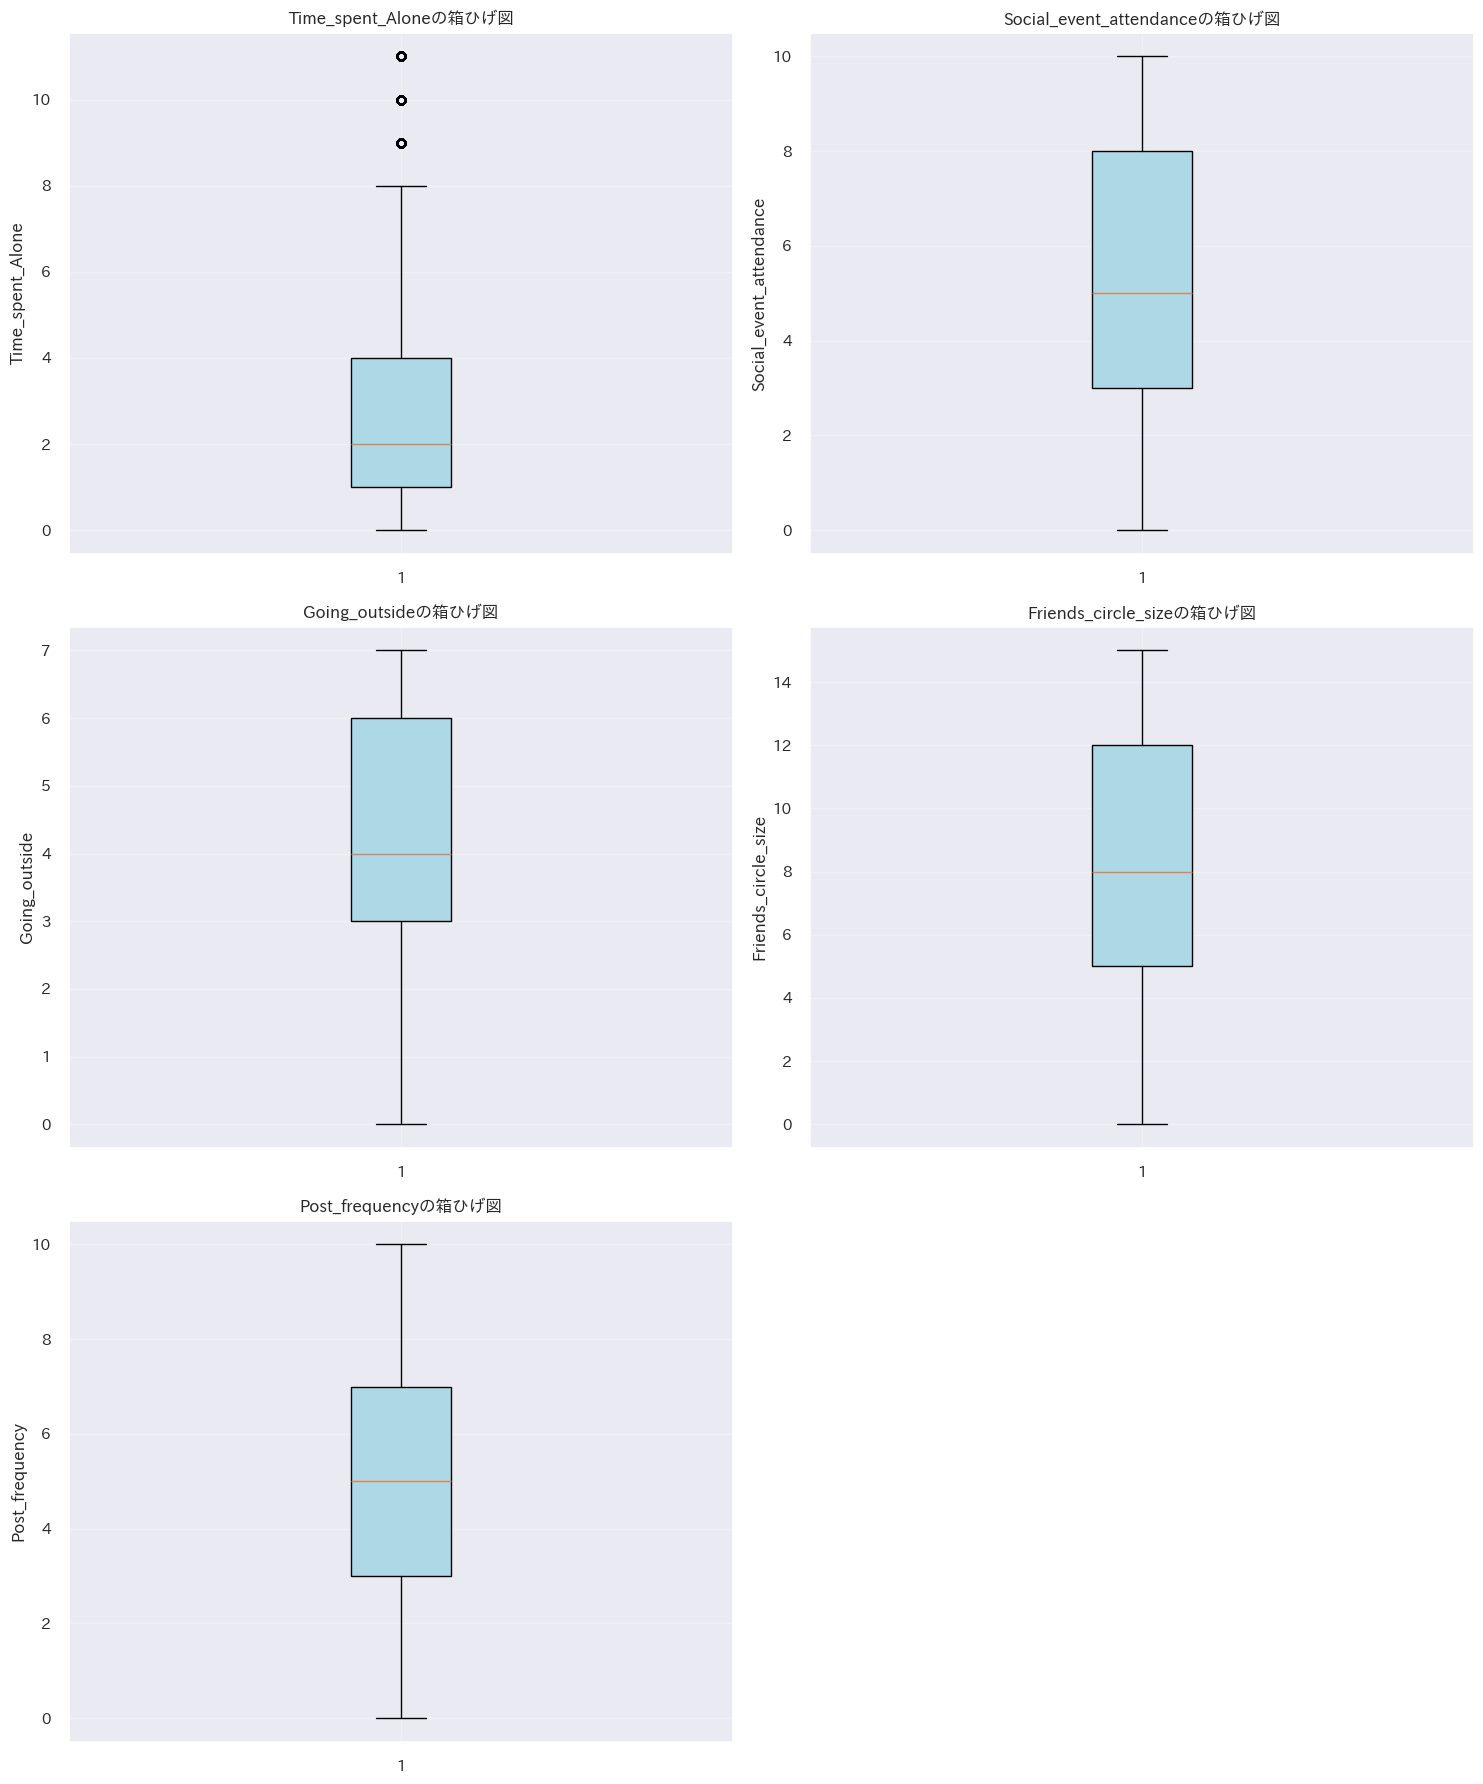

In [22]:
# 外れ値検出（箱ひげ図）
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    box_plot = axes[i].boxplot(train_df[col].dropna(), patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    axes[i].set_title(f'{col}の箱ひげ図', fontsize=12)
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

## 11. データ品質チェック

In [23]:
print("=== データ品質チェック ===")

# 重複行チェック
train_duplicates = train_df.duplicated().sum()
test_duplicates = test_df.duplicated().sum()
print(f"訓練データ重複行数: {train_duplicates}")
print(f"テストデータ重複行数: {test_duplicates}")

# ID重複チェック
train_id_duplicates = train_df['id'].duplicated().sum()
test_id_duplicates = test_df['id'].duplicated().sum()
print(f"訓練データID重複数: {train_id_duplicates}")
print(f"テストデータID重複数: {test_id_duplicates}")

# ID範囲チェック
print(f"\n訓練データID範囲: {train_df['id'].min()} - {train_df['id'].max()}")
print(f"テストデータID範囲: {test_df['id'].min()} - {test_df['id'].max()}")

# ID重複チェック（訓練・テスト間）
id_overlap = set(train_df['id']) & set(test_df['id'])
print(f"訓練・テスト間ID重複数: {len(id_overlap)}")

=== データ品質チェック ===
訓練データ重複行数: 0
テストデータ重複行数: 0
訓練データID重複数: 0
テストデータID重複数: 0

訓練データID範囲: 0 - 18523
テストデータID範囲: 18524 - 24698
訓練・テスト間ID重複数: 0


## 12. 総括と次のステップ

### 主要な発見

1. **クラス不均衡**: 外向型74% vs 内向型26%
2. **欠損値**: 全特徴量に5.69%〜10.22%の欠損
3. **特徴量品質**: 心理学的に妥当で予測力期待できる
4. **相関関係**: 多重共線性は低く、各特徴量が独立した情報を提供

### 推奨される前処理

1. **欠損値処理**: KNN補完、予測型補完を検討
2. **クラス不均衡対処**: StratifiedKFold、class_weight調整
3. **特徴量スケーリング**: StandardScaler適用

### 特徴量エンジニアリング候補

1. **相互作用特徴量**: Social×Going_outside等
2. **比率特徴量**: Time_alone/Social_events等
3. **一貫性メトリクス**: 回答パターンの一貫性
4. **欠損値フラグ**: 欠損パターン自体が特徴量

### 次のステップ

1. 特徴量エンジニアリング実装
2. ベースラインモデル構築
3. ハイパーパラメータ最適化
4. アンサンブル手法の検討